In [1]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def randomquicksort(A,times):
    comp = [0]
    randomquicksorthelper(A,0,len(A)-1,comp)
    times.append(comp[0])
    return comp[0] #time to be added
    
def randomquicksorthelper(A,first,last,comp):
    if last<first:return
    
    splitpoint,compspart = randompartition(A,first,last)
    tmp = comp.pop()
    comp.append(tmp+compspart)

    randomquicksorthelper(A,first,splitpoint-1,comp)
    randomquicksorthelper(A,splitpoint+1,last,comp)

def randompartition(A,first,last):
    partition_index = random.randint(first,last)
    #swap
    A[partition_index],A[first] = A[first],A[partition_index]
    
    pivot = A[first]
    compspart = 0
    l = first+1
    r = last
    
    while(True):
        while l <= r and A[l] <= pivot:
            l+=1;compspart +=1
        while A[r] >= pivot and r >= l:
            r-=1;compspart +=1
        compspart +=2
        
        if(r<l):break
        A[l],A[r] = A[r],A[l]
    
    A[first],A[r] = A[r],A[first]
    return r,compspart

def randomquicksorttimedistrib(s,r): 
    # Create an array of 1 .. n  
    n=s
    runs=r
    x = []
    for i in range(1,n+1):
        x.append(n+1-i)
    
    # Run quicksort for each permutation
    tlist =[]
    sums = 0
    for p in range(1,runs+1):
        y = list(x)
        sums+=randomquicksort(y,tlist)
        
    
    mean = statistics.mean(tlist)
    stdev = statistics.stdev(tlist)
    min_val = min(tlist)
    max_val = max(tlist)
    best_case = n*np.log2(n)
    worst_case = n*n
    avg_case = 1.38*n*np.log2(n)
    
    #show Info
    plt.hist(tlist, bins='auto')
    plt.title("Number of comparison of Quicksort for all permutaions")
    plt.xlabel("Comparisons of elements")
    plt.ylabel("Probability")
    plt.show()
    
    print("n",n)
    print("Runs",runs)
    print("Mean",mean)
    print("Stdev",stdev)
    print("Min",min_val)
    print("Max",max_val)
    print()
    print("---Teorical Values---")
    print("Best Case",best_case)
    print("Worst Case",worst_case)
    print("Avg Case",avg_case)
    print("Diff Avg Case with Mean",abs(avg_case-mean))
    print()
    print('Difference:')
    print(abs(avg_case - mean))
    print('Probability of 1.5 times Theoretical')
    
    

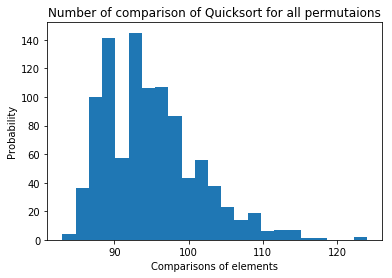

n 16
Runs 1000
Mean 94.912
Stdev 6.28010315963804
Min 83
Max 124

---Teorical Values---
Best Case 64.0
Worst Case 256
Avg Case 88.32
Diff Avg Case with Mean 6.592

Difference:
6.592


In [6]:
times = 1000
n = 16
randomquicksorttimedistrib(n,times)